In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [243]:
data = pd.read_csv("TSP_instances.csv", delimiter=",")
print(str(data.shape[0]) + " rows,", len(data.columns), "columns")
data.sample(5)

1244 rows, 30 columns


,instance_size,tenure,hood_size,selecetd_cities,selected_coordinates,initial_sol,improved_sol,initial_cost_km,improved_cost_km,improvement,...,std_dev_cluster_sizes,avg_cluster_density,avg_cluster_perimeter,avg_cluster_area,avg_cluster_complexity,eps_exec_time,dbscan_exec_time,nn_exec_time,tabu_exec_time,total_exec_time
137,105,27,47,"['Särö', 'Falun', 'Uppsala', 'Örebro', 'Väster...","{'Särö': (57.5, 11.9333), 'Falun': (60.6072, 1...","['Tullinge', 'Tumba', 'Rönninge', 'Södertälje'...","['Tumba', 'Pershagen', 'Rönninge', 'Södertälje...",6555.223,6112.677,442.546,...,0.0,3.402766,21.819698,29.681738,4.005014,0.001991,0.003953,0.000994,0.109741,0.113693
715,47,6,16,"['Oskarshamn', 'Nolvik', 'Varberg', 'Boo', 'Ka...","{'Oskarshamn': (57.265, 16.45), 'Nolvik': (57....","['Stockholm', 'Nacka', 'Boo', 'Kummelnäs', 'Fi...","['Stockholm', 'Nacka', 'Fisksätra', 'Boo', 'Ku...",3831.095,3812.691,18.404,...,3.5,8.093727,8.500230,3.291173,5.125322,0.001995,0.005526,0.000997,0.025979,0.031505
188,74,6,26,"['Visby', 'Härnösand', 'Östersund', 'Borås', '...","{'Visby': (57.629, 18.3071), 'Härnösand': (62....","['Kungsbacka', 'Särö', 'Kållered', 'Gothenburg...","['Karlstad', 'Gothenburg', 'Särö', 'Kållered',...",6116.956,5911.371,205.585,...,0.0,3.600727,17.603656,18.607355,4.080943,0.001995,0.002992,0.000000,0.048868,0.051860
195,110,16,46,"['Huskvarna', 'Sundsbruk', 'Umeå', 'Karlsborg'...","{'Huskvarna': (57.7919, 14.2756), 'Sundsbruk':...","['Jordbro', 'Vendelsö', 'Vega', 'Huddinge', 'T...","['Jordbro', 'Vendelsö', 'Vega', 'Huddinge', 'T...",6599.980,6503.262,96.718,...,47.5,173.378290,10.455536,11.626655,8.262654,0.001994,0.005984,0.000997,0.153589,0.160570
1172,95,14,43,"['Arvika', 'Karlstad', 'Frösakull', 'Vendelsö'...","{'Arvika': (59.6542, 12.5914), 'Karlstad': (59...","['Kungsbacka', 'Särö', 'Billdal', 'Kållered', ...","['Billdal', 'Särö', 'Kungsbacka', 'Kållered', ...",5834.431,5751.051,83.380,...,0.0,3.226636,21.244177,28.822584,3.957067,0.000998,0.002959,0.000997,0.093781,0.096741


In [244]:
print(str(data.shape[0]) + " rows,", len(data.columns), "columns")

1244 rows, 30 columns


In [245]:
# check if any none/null values
data.isna().sum()

instance_size                      0
tenure                             0
hood_size                          0
selecetd_cities                    0
selected_coordinates               0
initial_sol                        0
improved_sol                       0
initial_cost_km                    0
improved_cost_km                   0
improvement                        0
DBSCAN_min_sample                  0
DBSCAN_eps                         0
cluster_IDs                        0
cluster_sizes                      0
n_clusters                         0
n_noise_points                     0
avg_inter_cluster_distance_km    630
min_inter_cluster_distance_km    630
max_inter_cluster_distance_km    630
avg_silhouette                   630
std_dev_cluster_sizes              0
avg_cluster_density                0
avg_cluster_perimeter              0
avg_cluster_area                   0
avg_cluster_complexity             0
eps_exec_time                      0
dbscan_exec_time                   0
n

In [246]:
# Look at the information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   instance_size                  1244 non-null   int64  
 1   tenure                         1244 non-null   int64  
 2   hood_size                      1244 non-null   int64  
 3   selecetd_cities                1244 non-null   object 
 4   selected_coordinates           1244 non-null   object 
 5   initial_sol                    1244 non-null   object 
 6   improved_sol                   1244 non-null   object 
 7   initial_cost_km                1244 non-null   float64
 8   improved_cost_km               1244 non-null   float64
 9   improvement                    1244 non-null   float64
 10  DBSCAN_min_sample              1244 non-null   int64  
 11  DBSCAN_eps                     1244 non-null   float64
 12  cluster_IDs                    1244 non-null   o

In [247]:
# Look at the information about each columns and its dataset
data.describe()

,instance_size,tenure,hood_size,initial_cost_km,improved_cost_km,improvement,DBSCAN_min_sample,DBSCAN_eps,n_clusters,n_noise_points,...,std_dev_cluster_sizes,avg_cluster_density,avg_cluster_perimeter,avg_cluster_area,avg_cluster_complexity,eps_exec_time,dbscan_exec_time,nn_exec_time,tabu_exec_time,total_exec_time
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.00000,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,61.590836,12.244373,25.871383,4805.420244,4500.661345,304.75890,3.999196,1.436650,1.651125,4.069936,...,6.841110,27.729037,13.862100,14.655744,4.891608,0.001374,0.004438,0.000454,0.059468,0.064031
std,31.254834,6.886139,14.457067,1382.567541,1330.838660,273.17136,0.028352,0.507777,0.777079,2.552256,...,14.107192,52.187256,6.471039,10.447379,1.355473,0.000860,0.003456,0.000522,0.057313,0.058036
min,10.000000,5.000000,5.000000,1414.449000,1264.111000,0.00000,3.000000,0.294888,1.000000,0.000000,...,0.000000,0.395448,0.790227,0.030929,3.791388,0.000000,0.001860,0.000000,0.002957,0.004985
25%,34.000000,6.000000,13.000000,3736.292000,3425.178500,122.79600,4.000000,1.118923,1.000000,2.000000,...,0.000000,2.520442,8.311458,4.738784,4.050490,0.000997,0.002992,0.000000,0.012968,0.018918
50%,61.000000,11.000000,25.000000,5026.824000,4711.810500,230.84800,4.000000,1.288548,1.000000,4.000000,...,0.000000,3.685901,12.955663,12.737721,4.235690,0.000998,0.003989,0.000000,0.039893,0.043882
75%,89.000000,17.000000,38.000000,6003.444000,5670.074000,392.73150,4.000000,1.701624,2.000000,5.000000,...,4.242641,14.618056,20.321004,25.211006,5.040888,0.001994,0.004987,0.000997,0.085804,0.090026
max,116.000000,30.000000,57.000000,7880.831000,7366.570000,2065.36300,4.000000,4.812873,5.000000,15.000000,...,52.500000,229.010891,30.006726,36.909738,10.266775,0.012966,0.096750,0.002992,0.325130,0.336100


In [248]:
duplicates = data[data.duplicated(keep=False)]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:", len(duplicates))
    data.drop_duplicates(keep="first", inplace=True)

No duplicates found.


In [249]:
# another way to check duplicates based on number of cities and the chosen cities

# Initial number of rows
initial_row_count = len(data)

# Sorting the cities in each list to normalize the order
data["cities_sorted"] = data["selecetd_cities"].apply(lambda x: tuple(sorted(x)))

# Grouping the DataFrame based on sorted cities and city_count
grouped = data.groupby(["cities_sorted", "instance_size"])


# For each group, keep the row with the maximum 'improvement'
def filter_rows(group):
    if len(group) > 1:
        return group[group["improvement"] == group["improvement"].max()]
    return group


# Apply the filtering function and reset index
filtered_df = grouped.apply(filter_rows).reset_index(drop=True)

# Drop the added column
filtered_df.drop(columns=["cities_sorted"], inplace=True)

# Calculate the number of rows dropped
rows_dropped = initial_row_count - len(filtered_df)
rows_remaining = len(filtered_df)

print(f"Original number of rows: {initial_row_count}")
print(f"Number of rows dropped: {rows_dropped}")
print(f"Number of rows remaining: {rows_remaining}")

Original number of rows: 1244
Number of rows dropped: 0
Number of rows remaining: 1244


In [250]:
# Handling null values appropriately
clean_data = filtered_df.dropna()
print("remaining rows: " + str(clean_data.shape[0]) + " rows,", len(clean_data.columns), "columns")

remaining rows: 614 rows, 30 columns


In [251]:
# List of columns to keep
columns_to_keep = [
    "instance_size",
    "DBSCAN_eps",
    "n_clusters",
    "n_noise_points",
    "avg_inter_cluster_distance_km",
    "min_inter_cluster_distance_km",
    "max_inter_cluster_distance_km",
    "avg_silhouette",
    "std_dev_cluster_sizes",
    "avg_cluster_density",
    "avg_cluster_perimeter",
    "avg_cluster_area",
    "avg_cluster_complexity",
    "tenure",
]

# Create a new DataFrame with only the specified columns
new_data = clean_data[columns_to_keep]

<AxesSubplot:>

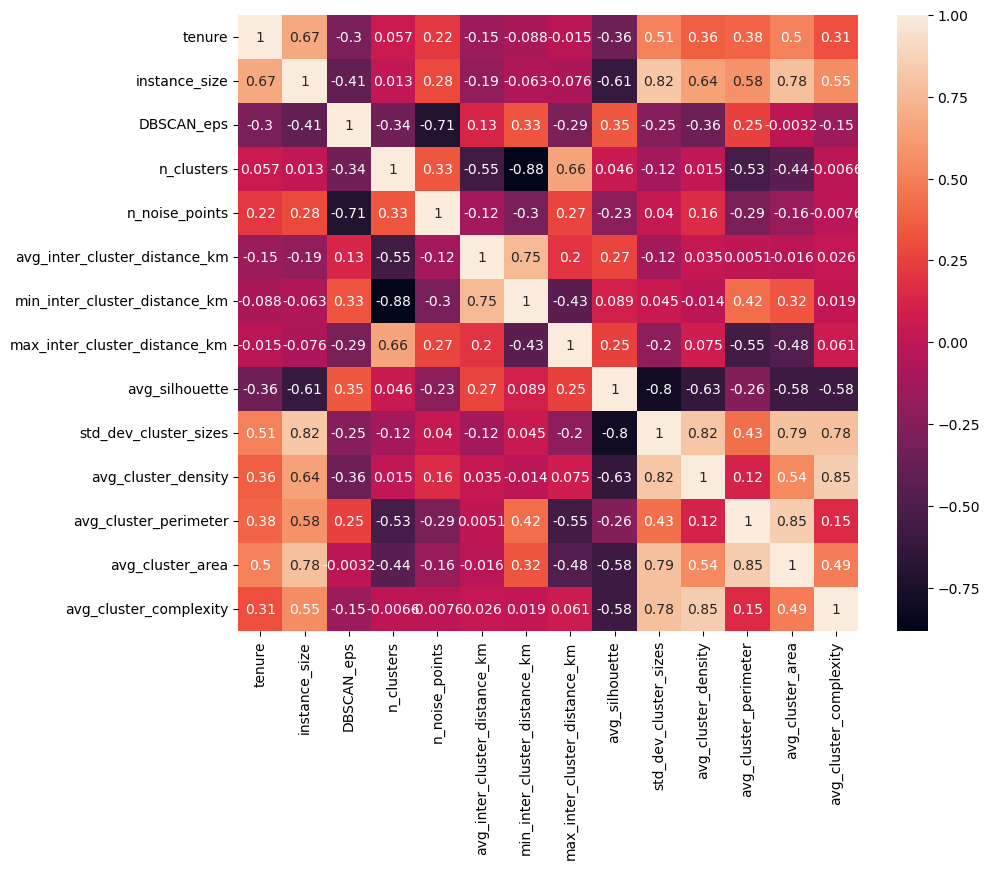

In [252]:
selected_columns = [
    "tenure",
    "instance_size",
    "DBSCAN_eps",
    "n_clusters",
    "n_noise_points",
    "avg_inter_cluster_distance_km",
    "min_inter_cluster_distance_km",
    "max_inter_cluster_distance_km",
    "avg_silhouette",
    "std_dev_cluster_sizes",
    "avg_cluster_density",
    "avg_cluster_perimeter",
    "avg_cluster_area",
    "avg_cluster_complexity",
]

subset_tempData = new_data[selected_columns]
corr = subset_tempData.corr()

# Customize the figure size
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True)

In [253]:
X = new_data.drop("tenure", axis=1)  # Adjust as necessary to drop non-feature columns
y = new_data["tenure"]

# Generate interaction terms for all combinations of features
# Set 'interaction_only=True' to only get interaction terms, 'degree=2' to limit to pairwise interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)

# Create a new DataFrame with the new polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Adding polynomial features to the original dataframe for better tracking
new_data = pd.concat([new_data, X_poly_df], axis=1)

In [261]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_df, y, test_size=0.2, random_state=42
)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso model
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display non-zero feature coefficients (those considered useful by Lasso)
coefficients = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso.coef_})
important_features = coefficients[coefficients["Coefficient"] != 0].sort_values(
    by="Coefficient", ascending=False
)
print("Important Features:\n", important_features)
important_feature_names = important_features["Feature"].tolist()
#print(important_feature_names)

Mean Squared Error: 24.345449458341683
Important Features:
                                               Feature  Coefficient
19                       instance_size avg_silhouette     2.797532
13                           instance_size DBSCAN_eps     2.287585
84       std_dev_cluster_sizes avg_cluster_complexity     1.695840
50               n_noise_points std_dev_cluster_sizes     1.644564
31                   DBSCAN_eps std_dev_cluster_sizes     1.229800
10                              avg_cluster_perimeter     1.129132
83             std_dev_cluster_sizes avg_cluster_area     1.123940
81          std_dev_cluster_sizes avg_cluster_density     1.012423
53                    n_noise_points avg_cluster_area     0.996676
35                  DBSCAN_eps avg_cluster_complexity     0.976103
64       min_inter_cluster_distance_km avg_silhouette     0.939553
39           n_clusters max_inter_cluster_distance_km     0.839499
55  avg_inter_cluster_distance_km min_inter_cluste...     0.606103
36

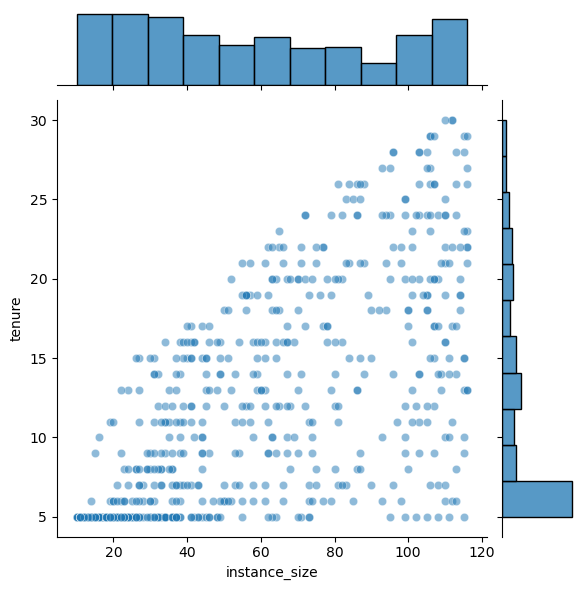

In [255]:
#

sns.jointplot(
    x=clean_data["instance_size"],
    y=clean_data["tenure"],
    alpha=0.5,
    height=6,
)

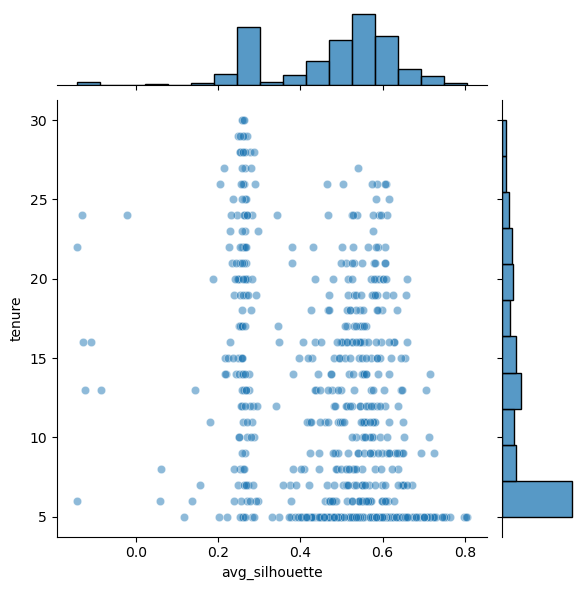

In [256]:
sns.jointplot(
    x=clean_data["avg_silhouette"],
    y=clean_data["tenure"],
    alpha=0.5,
    height=6,
)

In [257]:
print(data.columns.tolist())

['instance_size', 'tenure', 'hood_size', 'selecetd_cities', 'selected_coordinates', 'initial_sol', 'improved_sol', 'initial_cost_km', 'improved_cost_km', 'improvement', 'DBSCAN_min_sample', 'DBSCAN_eps', 'cluster_IDs', 'cluster_sizes', 'n_clusters', 'n_noise_points', 'avg_inter_cluster_distance_km', 'min_inter_cluster_distance_km', 'max_inter_cluster_distance_km', 'avg_silhouette', 'std_dev_cluster_sizes', 'avg_cluster_density', 'avg_cluster_perimeter', 'avg_cluster_area', 'avg_cluster_complexity', 'eps_exec_time', 'dbscan_exec_time', 'nn_exec_time', 'tabu_exec_time', 'total_exec_time', 'cities_sorted']


In [ ]:
important_data = new_data[important_feature_names]